In [1]:
# To obtain reproducible results
import sys
sys.path.insert(0, '/home/abanihi/devel/myprojects/deep-learning/')
from utils import reproducibility

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

# Load the data

In [3]:
(x_train, _), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (10000,))

In [5]:
x_train.dtype

dtype('uint8')

# Normalize the data

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the data

In [7]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [8]:
x_train.shape

(60000, 784)

# PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=36)

In [11]:
encoded_imgs = pca.fit(x_train).transform(x_test)

In [12]:
decoded_imgs = pca.inverse_transform(encoded_imgs)

# Visualize some reconstructed digits

In [13]:
def find_first_digit(d):
    return next(i for i in range(len(y_test)) if y_test[i]== d)

In [14]:
indices = [find_first_digit(d) for d in range(10)]

In [15]:
indices

[3, 2, 1, 18, 4, 8, 11, 0, 61, 7]

In [16]:
# How many digits to display
n = len(indices)
fig = plt.figure(figsize=(20, 4))

In [17]:
rows = 3
side = 6

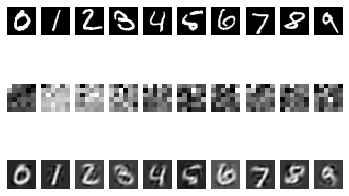

In [18]:
for i in range(n):
    ax = plt.subplot(rows, n, i + 1)
    plt.imshow(x_test[indices[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display encoding
    ax = plt.subplot(rows, n, i +1 + n)
    plt.imshow(((encoded_imgs[indices[i]] + 1) / 2).reshape(side, side))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(rows, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[indices[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [19]:
%load_ext version_information
%version_information numpy, keras, tensorflow, matplotlib

Software versions
Python 3.6.4 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.2.1
OS Linux 4.4.0 53 generic x86_64 with debian stretch sid
numpy 1.12.1
keras 2.0.9
tensorflow 1.3.0
matplotlib 2.1.1
Thu Jan 18 21:14:44 2018 CST